In [1]:
import numpy as np
import PIL.Image
from glob import glob

In [11]:
states = ["ky","va","wv"]
states_group = "-".join(np.sort(states))

lte_path = glob("fcc477actual/sentinel2/{}/npz/*npz".format(states_group))
lte = np.asarray([np.load(l, allow_pickle=True)["arr_0"] for l in lte_path])

In [12]:
cats = [2,5,10]

for c in cats:
    if c == 2: bins = [0, 75]
    else: bins = np.linspace(0,100,c)

    X = np.digitize(lte,bins).astype(np.uint8)
    X_imgs = [PIL.Image.fromarray(x) for x in X]
    
    for x,l in zip(X_imgs,lte_path):
        x.save(l.replace(".npz",".jpg").replace("npz\\","cat{}_".format(c)))

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


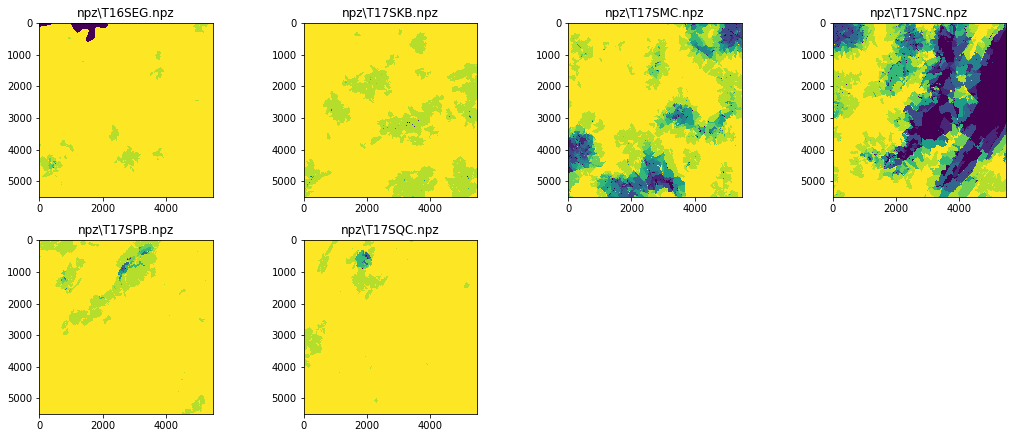

In [13]:
%pylab
%matplotlib inline
figure(figsize=(15,15))
for i,x in enumerate(X):
    subplot(5,4,i+1)
    title(lte_path[i].split("/")[-1])
    imshow(x)
tight_layout()